# Comparador con Histéresis

## Comparador simetrico

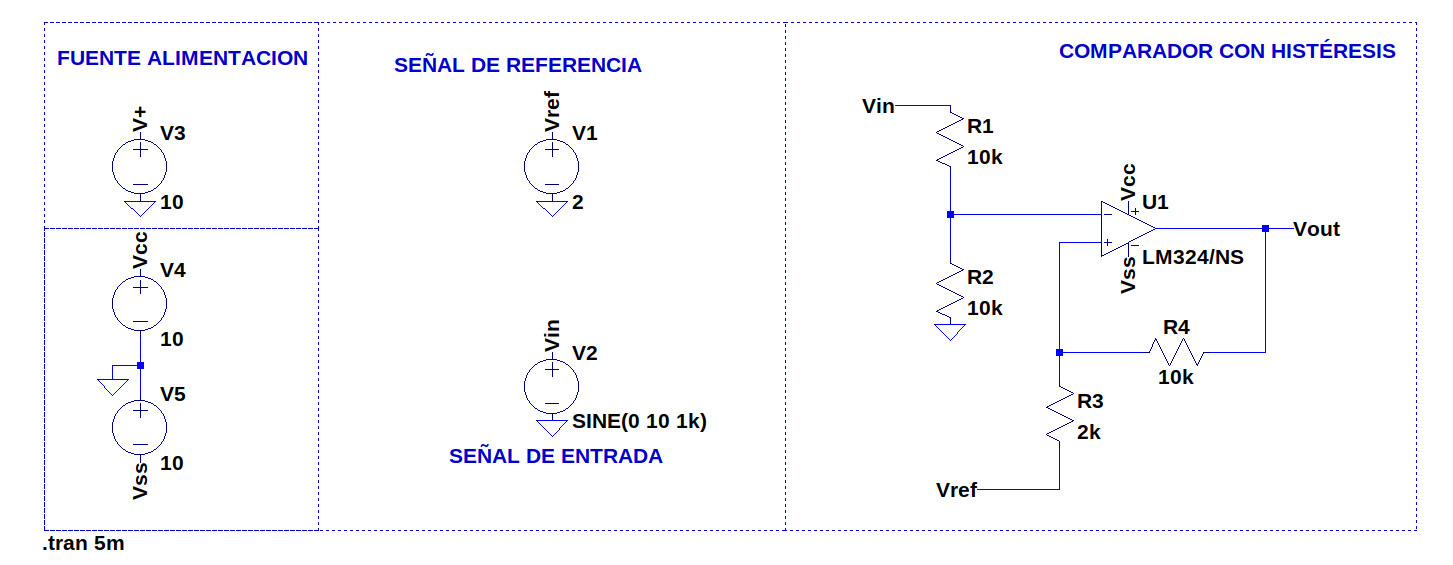

V_TH+ (subiendo) ≈ -0.7323327571428573 V
V_TH- (bajando) ≈ 6.917615714285715 V


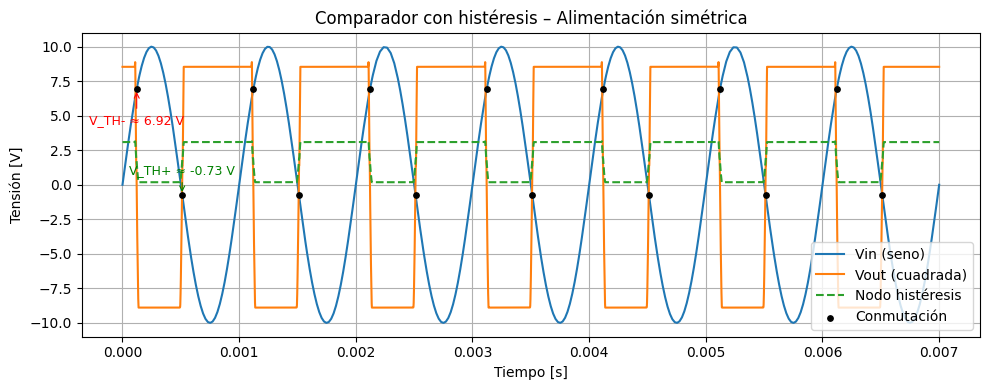

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Comp_Hist_sym.txt", sep="\t")
df.columns = df.columns.str.strip()

t    = df["time"].to_numpy()
vin  = df["V(vin)"].to_numpy()
vout = df["V(vout)"].to_numpy()
vref = df["V(n002)"].to_numpy()   # cambia el nombre si tu nodo es otro

# --- 1) Detectar instantes de conmutación en Vout ---
v_high = vout.max()
v_low  = vout.min()
umbral_vout = (v_high + v_low)/2      # mitad entre alto y bajo

estado = vout > umbral_vout           # True = alto, False = bajo
idx_edges = np.where(estado[1:] != estado[:-1])[0] + 1   # índices de cambio
t_edges   = t[idx_edges]
vin_edges = vin[idx_edges]

# Para saber si el cambio es bajo->alto o alto->bajo
delta_vout = vout[1:] - vout[:-1]
sign_edges = np.sign(delta_vout[idx_edges-1])   # >0: sube, <0: baja

# Umbral al subir y al bajar (promediamos para reducir ruido numérico)
Vth_subir_vals  = vin_edges[sign_edges > 0]
Vth_bajar_vals  = vin_edges[sign_edges < 0]

Vth_subir = Vth_subir_vals.mean()
Vth_bajar = Vth_bajar_vals.mean()

print("V_TH+ (subiendo) ≈", Vth_subir, "V")
print("V_TH- (bajando) ≈", Vth_bajar, "V")

# --- 2) Gráfico ---
plt.figure(figsize=(10,4))

plt.plot(t, vin,  label="Vin (seno)",      linewidth=1.5)
plt.plot(t, vout, label="Vout (cuadrada)", linewidth=1.5)
plt.plot(t, vref, label="Nodo histéresis", linewidth=1.5, linestyle="--")

# Puntos de conmutación sobre Vin (todos)
plt.scatter(t_edges, vin_edges, color="k", s=15, zorder=3, label="Conmutación")

# Elegimos un punto representativo para etiquetar cada umbral
t_subir = t_edges[sign_edges > 0][0]   # primer cambio bajo->alto
t_bajar = t_edges[sign_edges < 0][0]   # primer cambio alto->bajo

# Etiquetas de texto en el gráfico
plt.annotate(f"V_TH+ ≈ {Vth_subir:.2f} V",
             xy=(t_subir, Vth_subir),
             xytext=(0, 15),
             textcoords="offset points",
             ha="center", fontsize=9,
             color="green",
             arrowprops=dict(arrowstyle="->", color="green", lw=0.8))

plt.annotate(f"V_TH- ≈ {Vth_bajar:.2f} V",
             xy=(t_bajar, Vth_bajar),
             xytext=(0, -25),
             textcoords="offset points",
             ha="center", fontsize=9,
             color="red",
             arrowprops=dict(arrowstyle="->", color="red", lw=0.8))

plt.xlabel("Tiempo [s]")
plt.ylabel("Tensión [V]")
plt.title("Comparador con histéresis – Alimentación simétrica")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


ASIMÉTRICO:
V_TH+ (subiendo) ≈ 0.75255559 V
V_TH- (bajando) ≈ 1.5470982000000002 V


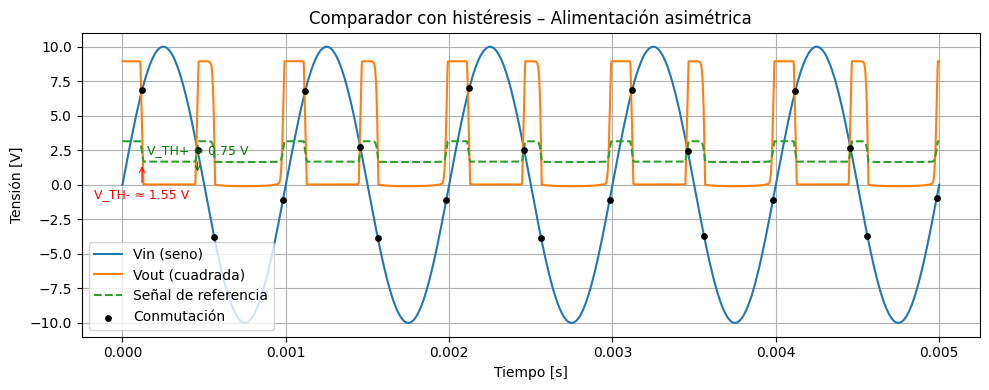

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Archivo exportado para el caso asimétrico
FILE_PATH = "Comp_Hist_asym.txt"

df = pd.read_csv(FILE_PATH, sep="\t")
df.columns = df.columns.str.strip()

t    = df["time"].to_numpy()
vin  = df["V(vin)"].to_numpy()
vout = df["V(vout)"].to_numpy()
vref = df["V(n002)"].to_numpy()   # cambiá el nombre si tu nodo es otro

# --- 1) detectar instantes de conmutación en Vout ---
v_high = vout.max()
v_low  = vout.min()
umbral_vout = (v_high + v_low) / 2.0  # mitad entre alto y bajo

estado = vout > umbral_vout          # True = alto, False = bajo
idx_edges = np.where(estado[1:] != estado[:-1])[0] + 1
t_edges   = t[idx_edges]
vin_edges = vin[idx_edges]

# signo del cambio (sube/baja)
delta_vout = vout[1:] - vout[:-1]
sign_edges = np.sign(delta_vout[idx_edges-1])   # >0 sube, <0 baja

# Umbrales al subir y al bajar (promedio sobre todos los períodos)
Vth_subir_vals = vin_edges[sign_edges > 0]
Vth_bajar_vals = vin_edges[sign_edges < 0]

Vth_subir = Vth_subir_vals.mean()
Vth_bajar = Vth_bajar_vals.mean()

print("ASIMÉTRICO:")
print("V_TH+ (subiendo) ≈", Vth_subir, "V")
print("V_TH- (bajando) ≈", Vth_bajar, "V")

# --- 2) gráfico con puntos y etiquetas ---
plt.figure(figsize=(10,4))

plt.plot(t, vin,  label="Vin (seno)",      linewidth=1.5)
plt.plot(t, vout, label="Vout (cuadrada)", linewidth=1.5)
plt.plot(t, vref, label="Señal de referencia", linewidth=1.5, linestyle="--")

# Puntos de conmutación sobre Vin (todos)
plt.scatter(t_edges, vin_edges, color="k", s=15, zorder=3, label="Conmutación")

# Elegimos un punto representativo para etiquetar cada umbral
t_subir = t_edges[sign_edges > 0][0]   # primer cambio bajo->alto
t_bajar = t_edges[sign_edges < 0][0]   # primer cambio alto->bajo

plt.annotate(f"V_TH+ ≈ {Vth_subir:.2f} V",
             xy=(t_subir, Vth_subir),
             xytext=(0, 15),
             textcoords="offset points",
             ha="center", fontsize=9,
             color="green",
             arrowprops=dict(arrowstyle="->", color="green", lw=0.8))

plt.annotate(f"V_TH- ≈ {Vth_bajar:.2f} V",
             xy=(t_bajar, Vth_bajar),
             xytext=(0, -25),
             textcoords="offset points",
             ha="center", fontsize=9,
             color="red",
             arrowprops=dict(arrowstyle="->", color="red", lw=0.8))

plt.xlabel("Tiempo [s]")
plt.ylabel("Tensión [V]")
plt.title("Comparador con histéresis – Alimentación asimétrica")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

